# FakeNewsDetection

In [1]:
pip install pythainlp

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
import pythainlp
from pythainlp import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from pythainlp.corpus import get_corpus
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# รวมไฟล์ Fake News แะ Real Newsไว้ที่ manual_testing.csv

In [3]:
df = pd.read_csv('manual_testing.csv')
df.head(115)

,Unnamed: 0,no,text,date,class
0,0,1,ยอดผู้ติดเชื้อโควิด19 วันศุกร์ที่ 30 กรกฏาคม 2...,30 กรกฏาคม 2564,0
1,1,2,"สถานการณ์ โควิด19 ในประเทศไทย ติดเชื้อ 17,345 ...",30 กรกฏาคม 2564,0
2,2,3,จำนวนผู้ติดเชื้อ โควิด19 จากคลัสเตอร์ใหม่ที่พบ...,29 กรกฏาคม 2564,0
3,3,4,"443 ราย ติดเชื้อครอบครัว,ที่ทำงาน,ตลาด เด็กต่ำ...",30 กรกฏาคม 2564,0
4,4,5,30 กรกฎาคม 64 สถานการณ์ โควิด19 ในประเทศไทย ตั...,30 กรกฏาคม 2564,0
...,...,...,...,...,...
110,39,40,ศูนย์บริหารสถานการณ์แพร่ระบาดของโรคติดเชื้อไวร...,25 สิงหาคม 2564,1
111,40,41,ศูนย์บริหารสถานการณ์แพร่ระบาดของโรคติดเชื้อไวร...,09 กรกฎาคม 2564,1
112,41,42,วัคซีนซิโนแวค 2 เข็ม และกระตุ้นด้วยแอสตราเซเนก...,09 กรกฎาคม 2564,1
113,42,43,23 มิถุนายน เสียชีวิต 51 ราย เป็นสถิติเสียชีวิ...,23 มิถุนายน 2564,1


In [4]:
df = df.drop(columns=[ 'date'], axis=1)

In [5]:
df = df.dropna(axis=0)

In [6]:
len(df)

115

In [7]:
df['clean_news'] = df['text'].str.lower()
df['clean_news']

0      ยอดผู้ติดเชื้อโควิด19 วันศุกร์ที่ 30 กรกฏาคม 2...
1      สถานการณ์ โควิด19 ในประเทศไทย ติดเชื้อ 17,345 ...
2      จำนวนผู้ติดเชื้อ โควิด19 จากคลัสเตอร์ใหม่ที่พบ...
3      443 ราย ติดเชื้อครอบครัว,ที่ทำงาน,ตลาด เด็กต่ำ...
4      30 กรกฎาคม 64 สถานการณ์ โควิด19 ในประเทศไทย ตั...
                             ...                        
110    ศูนย์บริหารสถานการณ์แพร่ระบาดของโรคติดเชื้อไวร...
111    ศูนย์บริหารสถานการณ์แพร่ระบาดของโรคติดเชื้อไวร...
112    วัคซีนซิโนแวค 2 เข็ม และกระตุ้นด้วยแอสตราเซเนก...
113    23 มิถุนายน เสียชีวิต 51 ราย เป็นสถิติเสียชีวิ...
114    สํานักงานคณะกรรมการอาหารและยาอนุมัติทะเบียนวัค...
Name: clean_news, Length: 115, dtype: object

In [8]:
FAKE='''
ยอดผู้ติดเชื้อโควิด19 วันศุกร์ที่ 30 กรกฏาคมคมคม 2564 รวม 17,345 ราย 
ผู้ป่วยสะสม 549,512 ราย ตั้งแต่ 1 เมษายน หายป่วยกลับบ้าน 10,678 ราย 
หายป่วยสะสม 353,744 ราย ตั้งแต่ 1 เมษายน ผู้ป่วยกำลังรักษา 192,526 ราย 
เสียชีวิต 117 ราย

จำนวนผู้ติดเชื้อ โควิด19 จากคลัสเตอร์ใหม่ที่พบ ณ วันที่ 29 ก.ค. 64 สมุทรสาคร 
โรงงานผลิตภัณฑ์ปลา, บริษัทยางรถยนต์ รวม 27 ราย ปทุมธานี บริษัทยางรถยนต์ 25 ราย 
สมุทรปราการ บริษัทระบบกำลังไฟฟ้า 10 ราย ชลบุรี โรงงานเครื่องปรับอากาศ 15 ราย 
สงขลา โรงงานแม่แบบเซรามิค 13 ราย

30 ก.ค. 64 สถานการณ์ โควิด19 ในประเทศไทย ตั้งแต่ 1เมษายน 2564 
รวม 17,345 ราย ผู้ป่วยสะสม 549,512 ราย ตั้งแต่ 1 เมษายน หายป่วยกลับบ้าน 10,678 ราย
หายป่วยสะสม 353,744 ราย ตั้งแต่ 1 เมษายน ผู้ป่วยกำลังรักษา 192,526 ราย เสียชีวิต 117 ราย 

กทม.พบผู้ติดเชื้อ วันนี้ เพิ่ม 539 ราย อยู่ระหว่างการสอบสวนโรค 302 ราย 
โดยเขตที่มีผู้ติดเชื้อวันนี้สูงสุดประกอบด้วย จตุจักร 16 ราย บางซื่อ 13 ราย 
เขตที่ไม่มีผู้ติดเชื้อในวันนี้มี 9 เขต คือ ดอนเมือง บางกอกใหญ่ บางบอน
บางรัก ป้อมปราบฯ พระโขนง ลาดกระบัง สะพานสูง และหนองจอก

'''
print(FAKE)


ยอดผู้ติดเชื้อโควิด19 วันศุกร์ที่ 30 กรกฏาคมคมคม 2564 รวม 17,345 ราย 
ผู้ป่วยสะสม 549,512 ราย ตั้งแต่ 1 เมษายน หายป่วยกลับบ้าน 10,678 ราย 
หายป่วยสะสม 353,744 ราย ตั้งแต่ 1 เมษายน ผู้ป่วยกำลังรักษา 192,526 ราย 
เสียชีวิต 117 ราย

จำนวนผู้ติดเชื้อ โควิด19 จากคลัสเตอร์ใหม่ที่พบ ณ วันที่ 29 ก.ค. 64 สมุทรสาคร 
โรงงานผลิตภัณฑ์ปลา, บริษัทยางรถยนต์ รวม 27 ราย ปทุมธานี บริษัทยางรถยนต์ 25 ราย 
สมุทรปราการ บริษัทระบบกำลังไฟฟ้า 10 ราย ชลบุรี โรงงานเครื่องปรับอากาศ 15 ราย 
สงขลา โรงงานแม่แบบเซรามิค 13 ราย

30 ก.ค. 64 สถานการณ์ โควิด19 ในประเทศไทย ตั้งแต่ 1เมษายน 2564 
รวม 17,345 ราย ผู้ป่วยสะสม 549,512 ราย ตั้งแต่ 1 เมษายน หายป่วยกลับบ้าน 10,678 ราย
หายป่วยสะสม 353,744 ราย ตั้งแต่ 1 เมษายน ผู้ป่วยกำลังรักษา 192,526 ราย เสียชีวิต 117 ราย 

กทม.พบผู้ติดเชื้อ วันนี้ เพิ่ม 539 ราย อยู่ระหว่างการสอบสวนโรค 302 ราย 
โดยเขตที่มีผู้ติดเชื้อวันนี้สูงสุดประกอบด้วย จตุจักร 16 ราย บางซื่อ 13 ราย 
เขตที่ไม่มีผู้ติดเชื้อในวันนี้มี 9 เขต คือ ดอนเมือง บางกอกใหญ่ บางบอน
บางรัก ป้อมปราบฯ พระโขนง ลาดกระบัง สะพานสูง 

In [9]:
words = word_tokenize(FAKE)
print(words)

['\n', 'ยอด', 'ผู้', 'ติดเชื้อ', 'โควิด', '19', ' ', 'วัน', 'ศุกร์', 'ที่', ' ', '30', ' ', 'กรก', 'ฏาคมคมคม', ' ', '2564', ' ', 'รวม', ' ', '17,345', ' ', 'ราย', ' ', '\n', 'ผู้ป่วย', 'สะสม', ' ', '549,512', ' ', 'ราย', ' ', 'ตั้งแต่', ' ', '1', ' ', 'เมษายน', ' ', 'หายป่วย', 'กลับบ้าน', ' ', '10,678', ' ', 'ราย', ' ', '\n', 'หายป่วย', 'สะสม', ' ', '353,744', ' ', 'ราย', ' ', 'ตั้งแต่', ' ', '1', ' ', 'เมษายน', ' ', 'ผู้ป่วย', 'กำลัง', 'รักษา', ' ', '192,526', ' ', 'ราย', ' ', '\n', 'เสียชีวิต', ' ', '117', ' ', 'ราย', '\n', '\n', 'จำนวน', 'ผู้', 'ติดเชื้อ', ' ', 'โควิด', '19', ' ', 'จาก', 'คลัสเตอร์', 'ใหม่', 'ที่', 'พบ', ' ', 'ณ', ' ', 'วันที่', ' ', '29', ' ', 'ก.ค.', ' ', '64', ' ', 'สมุทรสาคร', ' ', '\n', 'โรงงาน', 'ผลิตภัณฑ์', 'ปลา', ',', ' ', 'บริษัท', 'ยางรถยนต์', ' ', 'รวม', ' ', '27', ' ', 'ราย', ' ', 'ปทุมธานี', ' ', 'บริษัท', 'ยางรถยนต์', ' ', '25', ' ', 'ราย', ' ', '\n', 'สมุทรปราการ', ' ', 'บริษัท', 'ระบบ', 'กำลังไฟฟ้า', ' ', '10', ' ', 'ราย', ' ', 'ชลบุรี', ' ', 'โรงงาน

In [10]:
all_words = ' '.join(words).lower().strip()
# all_word = re.sub('(\n|\s{2})', '', all_words)
all_words[:500]

'ยอด ผู้ ติดเชื้อ โควิด 19   วัน ศุกร์ ที่   30   กรก ฏาคมคมคม   2564   รวม   17,345   ราย   \n ผู้ป่วย สะสม   549,512   ราย   ตั้งแต่   1   เมษายน   หายป่วย กลับบ้าน   10,678   ราย   \n หายป่วย สะสม   353,744   ราย   ตั้งแต่   1   เมษายน   ผู้ป่วย กำลัง รักษา   192,526   ราย   \n เสียชีวิต   117   ราย \n \n จำนวน ผู้ ติดเชื้อ   โควิด 19   จาก คลัสเตอร์ ใหม่ ที่ พบ   ณ   วันที่   29   ก.ค.   64   สมุทรสาคร   \n โรงงาน ผลิตภัณฑ์ ปลา ,   บริษัท ยางรถยนต์   รวม   27   ราย   ปทุมธานี   บริษัท ยางรถยนต์   2'

# StopWords

In [11]:
stopwords = {'ราย'} # set
print(type(stopwords))
print(stopwords)

<class 'set'>
{'ราย'}


# WordCloud

(-0.5, 799.5, 499.5, -0.5)

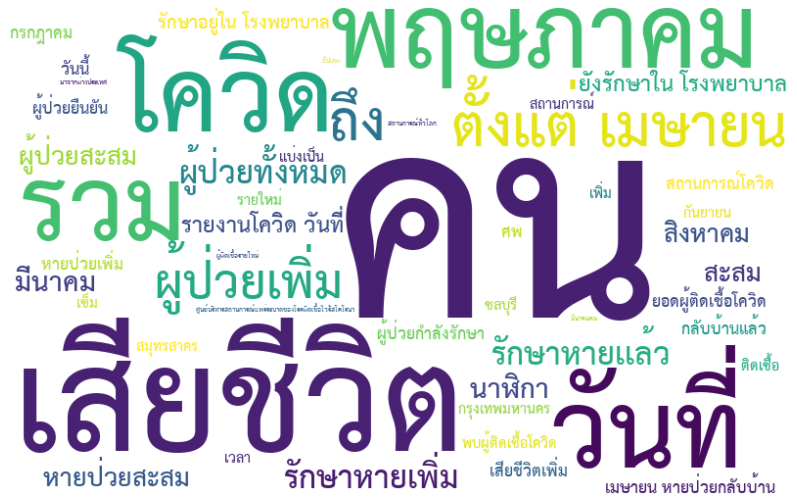

In [12]:
all_words = " ".join([sentence for sentence in df['clean_news']])
all_words[:500]
wordcloud = WordCloud(font_path='C:/Users/DELL/AppData/Local/Microsoft/Windows/Fonts/THSarabunNew Bold.ttf',
    regexp='[ก-๙]+', stopwords=stopwords,width=800, height=500, random_state=42,prefer_horizontal=1,
    max_words=50,  background_color = 'white').generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.show()

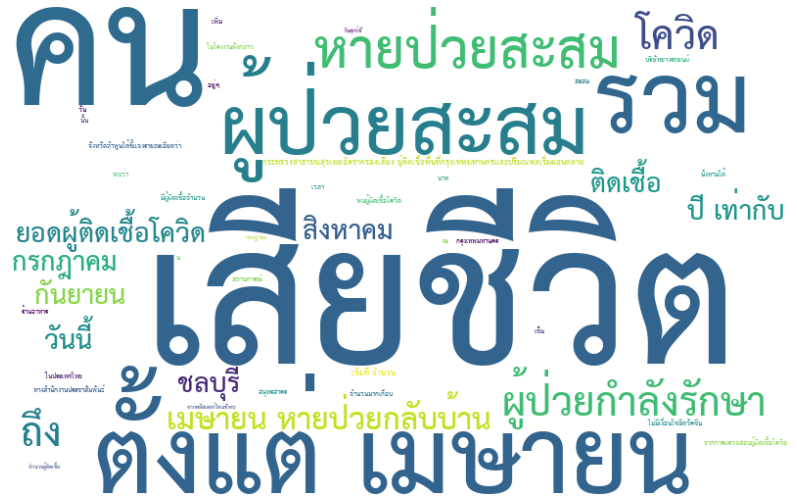

In [13]:
all_words = " ".join([sentence for sentence in df['clean_news'][df['class']==0]])
all_words[:500]

wordcloud = WordCloud(font_path='C:/Users/DELL/AppData/Local/Microsoft/Windows/Fonts/THSarabunNew Bold.ttf',
    regexp='[ก-๙]+', stopwords=stopwords,width=800, height=500, random_state=50,prefer_horizontal=1,
    max_words=50,  background_color = 'white').generate(all_words)


# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

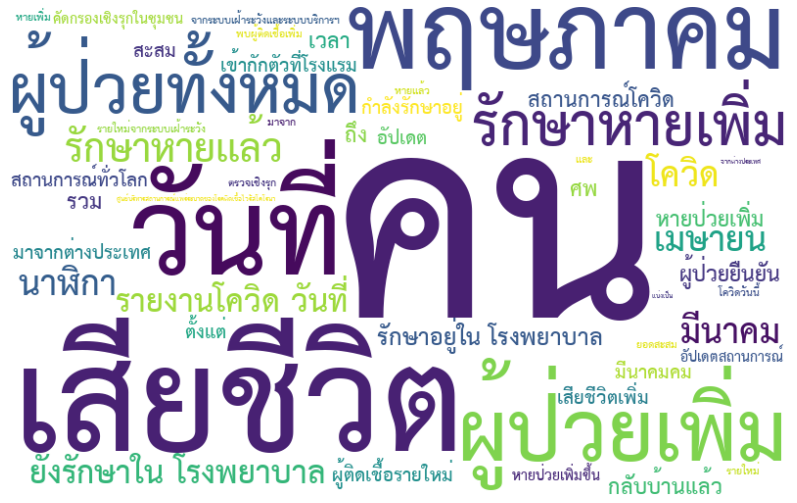

In [14]:
all_words = " ".join([sentence for sentence in df['text'][df['class']==1]])
all_words[:500]

wordcloud = WordCloud(font_path='C:/Users/DELL/AppData/Local/Microsoft/Windows/Fonts/THSarabunNew Bold.ttf',
    regexp='[ก-๙]+', stopwords=stopwords,width=800, height=500, random_state=42,prefer_horizontal=1,
    max_words=50,  background_color = 'white').generate(all_words)


# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Random Forest

In [19]:
x = df["text"]
y = df["class"]

In [20]:
x_train,x_test,y_tarin,y_test = train_test_split(x,y,test_size=.25)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectrorization = TfidfVectorizer()
xv_train = vectrorization.fit_transform(x_train)
xv_test = vectrorization.transform(x_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_tarin)

RandomForestClassifier(random_state=0)

In [25]:
RFC.score(xv_test,y_test)

0.7931034482758621

In [26]:
pred_RFC = RFC.predict(xv_test)

In [27]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        18
           1       1.00      0.45      0.62        11

    accuracy                           0.79        29
   macro avg       0.88      0.73      0.74        29
weighted avg       0.84      0.79      0.77        29

